In [1]:
%run ../init.ipynb

In [2]:
%cd ../../toy/

/home/vadmas/dev/projects/active/qstuff/qpaths_uai_2021/toy


In [18]:
import scipy
from src.ais import Student1D, student_moment_average
from src.paths import qpath

In [10]:
def get_y(dist, x):
    Z = scipy.integrate.quad(lambda x: np.exp(dist.logprob(x)), -20, 20)[0]
    y = np.exp(dist.logprob(x))
    if len(y.shape) == 2:
        y = y[0]
    return y / Z

/home/vadmas/miniconda/envs/ml3_lite/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3_lite/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/home/vadmas/miniconda/envs/ml3_lite/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)


saved to qmoments_qpath.pdf


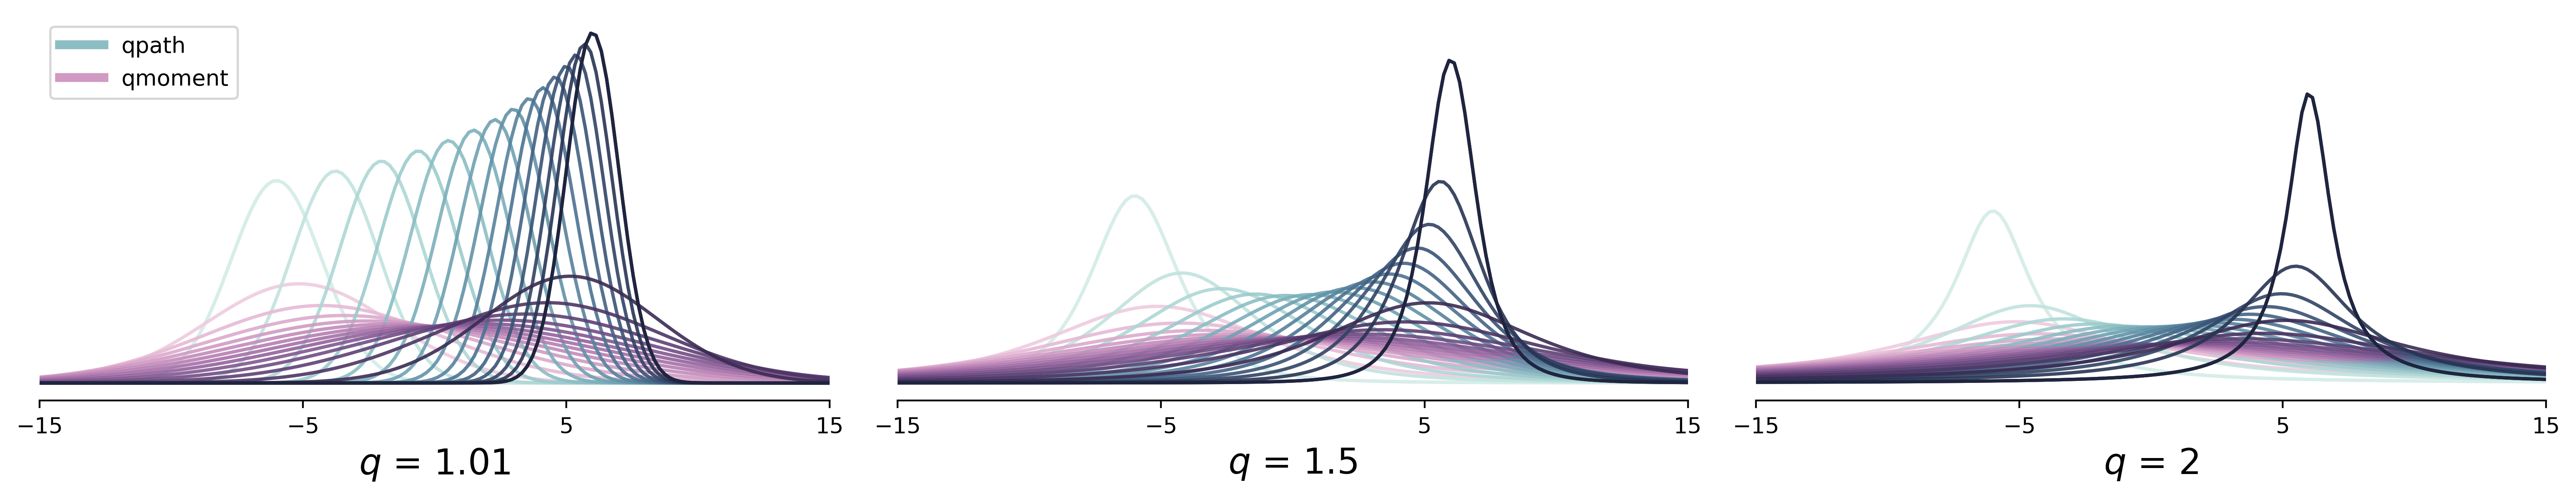

In [17]:
fig, axes = plt.subplots(1, 3,
                         sharey='row',
                         dpi=200,
                         constrained_layout=True,
                         figsize=(16, 3))

x = np.linspace(-20, 20, 200)

n_betas = 15
beta_vec = np.linspace(0, 1, n_betas)

pal1 = sns.cubehelix_palette(n_betas, rot=-.25, light=.9)
pal2 = sns.cubehelix_palette(n_betas, rot=.25,  light=.9)

qs = [1.01, 1.5, 2]


for q_idx, q in enumerate(qs):
    proposal = Student1D(q=q, mean=-6.0, variance=3)
    target   = Student1D(q=q, mean=6.0, variance=1)

    for beta_idx, beta in enumerate(beta_vec):
        q_moments = student_moment_average(proposal, target, beta)
        q_path_dist = qpath(proposal, target, beta, q)

        m_alpha = 0.9
        q_alpha = 0.9
        if (beta_idx == 0) or (beta_idx == n_betas -1):
            m_alpha = 1
            q_alpha = 1

        axes[q_idx].plot(x, 
                     get_y(q_moments, x),
                     color=pal2[beta_idx],
                     alpha=m_alpha,
                    )


        axes[q_idx].plot(x, 
                     get_y(q_path_dist, x),
                     color=pal1[beta_idx],
                     alpha=q_alpha,
                    )


for idx, ax in enumerate(axes.flatten()):
    ax.set_xlim(-15, 15)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([-15, -5, 5, 15])
    ax.set_xlabel(r"$q$ = {}".format(qs[idx]), fontsize=16)
    sns.despine(ax=ax, trim=True, left=True)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=pal1[4], lw=4),
                Line2D([0], [0], color=pal2[4], lw=4)]

axes[0].legend(custom_lines, ['qpath', 'qmoment'], loc="upper left", )
    

plot_dir = Path('.')
filename = plot_dir / f"qmoments_qpath.pdf"
fig.savefig(filename, bbox_inches='tight')
print('saved to {}'.format(filename))

plt.show()
